In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


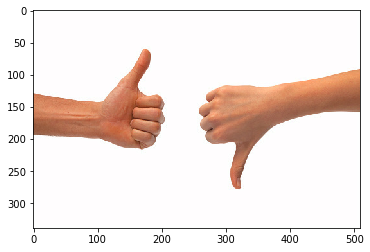

In [3]:
image = cv2.imread('thumbs_up_down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


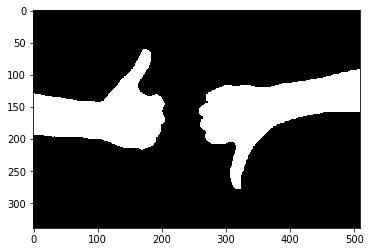

In [5]:


# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')



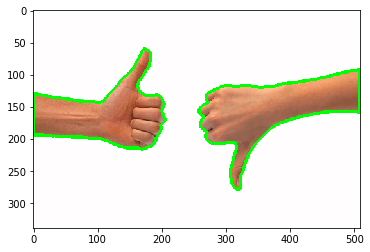

In [10]:
# Find contours from thresholded, binary image

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

In [11]:
# orienatinn of Contour


In [12]:
def orientataion(contour):
    angles = []
    for contour in contours:
        (x, y), (MA, ma),angle = cv2.fitEllipse(contour)
        angles.append(angle)
    return angles

In [14]:
angles = orientataion(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


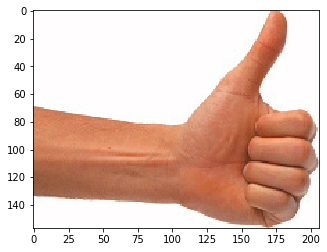

In [15]:
def left_hand_crop(image, selected_contour):
    x, y, w, h = cv2.boundingRect(selected_contour)
    
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y: y + h, x: x + w]
    
    return cropped_image

selected_contour = contours[1]


if(selected_contour is not None):
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)
